<a href="https://colab.research.google.com/github/grodriguez1123/Metodos1_AndreaRocha_GabrielaRodriguez/blob/main/Tarea_Integraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import sympy as sym

#Tarea Integración
Andrea Rocha 202311471

Gabriela Rodriguez 202320229

3, 5, 6, 7, 9, 10, 15, 16, 17, 21

##3. (Theoretical) Hacer los pasos intermedios para encontrar la regla de Simpson simple

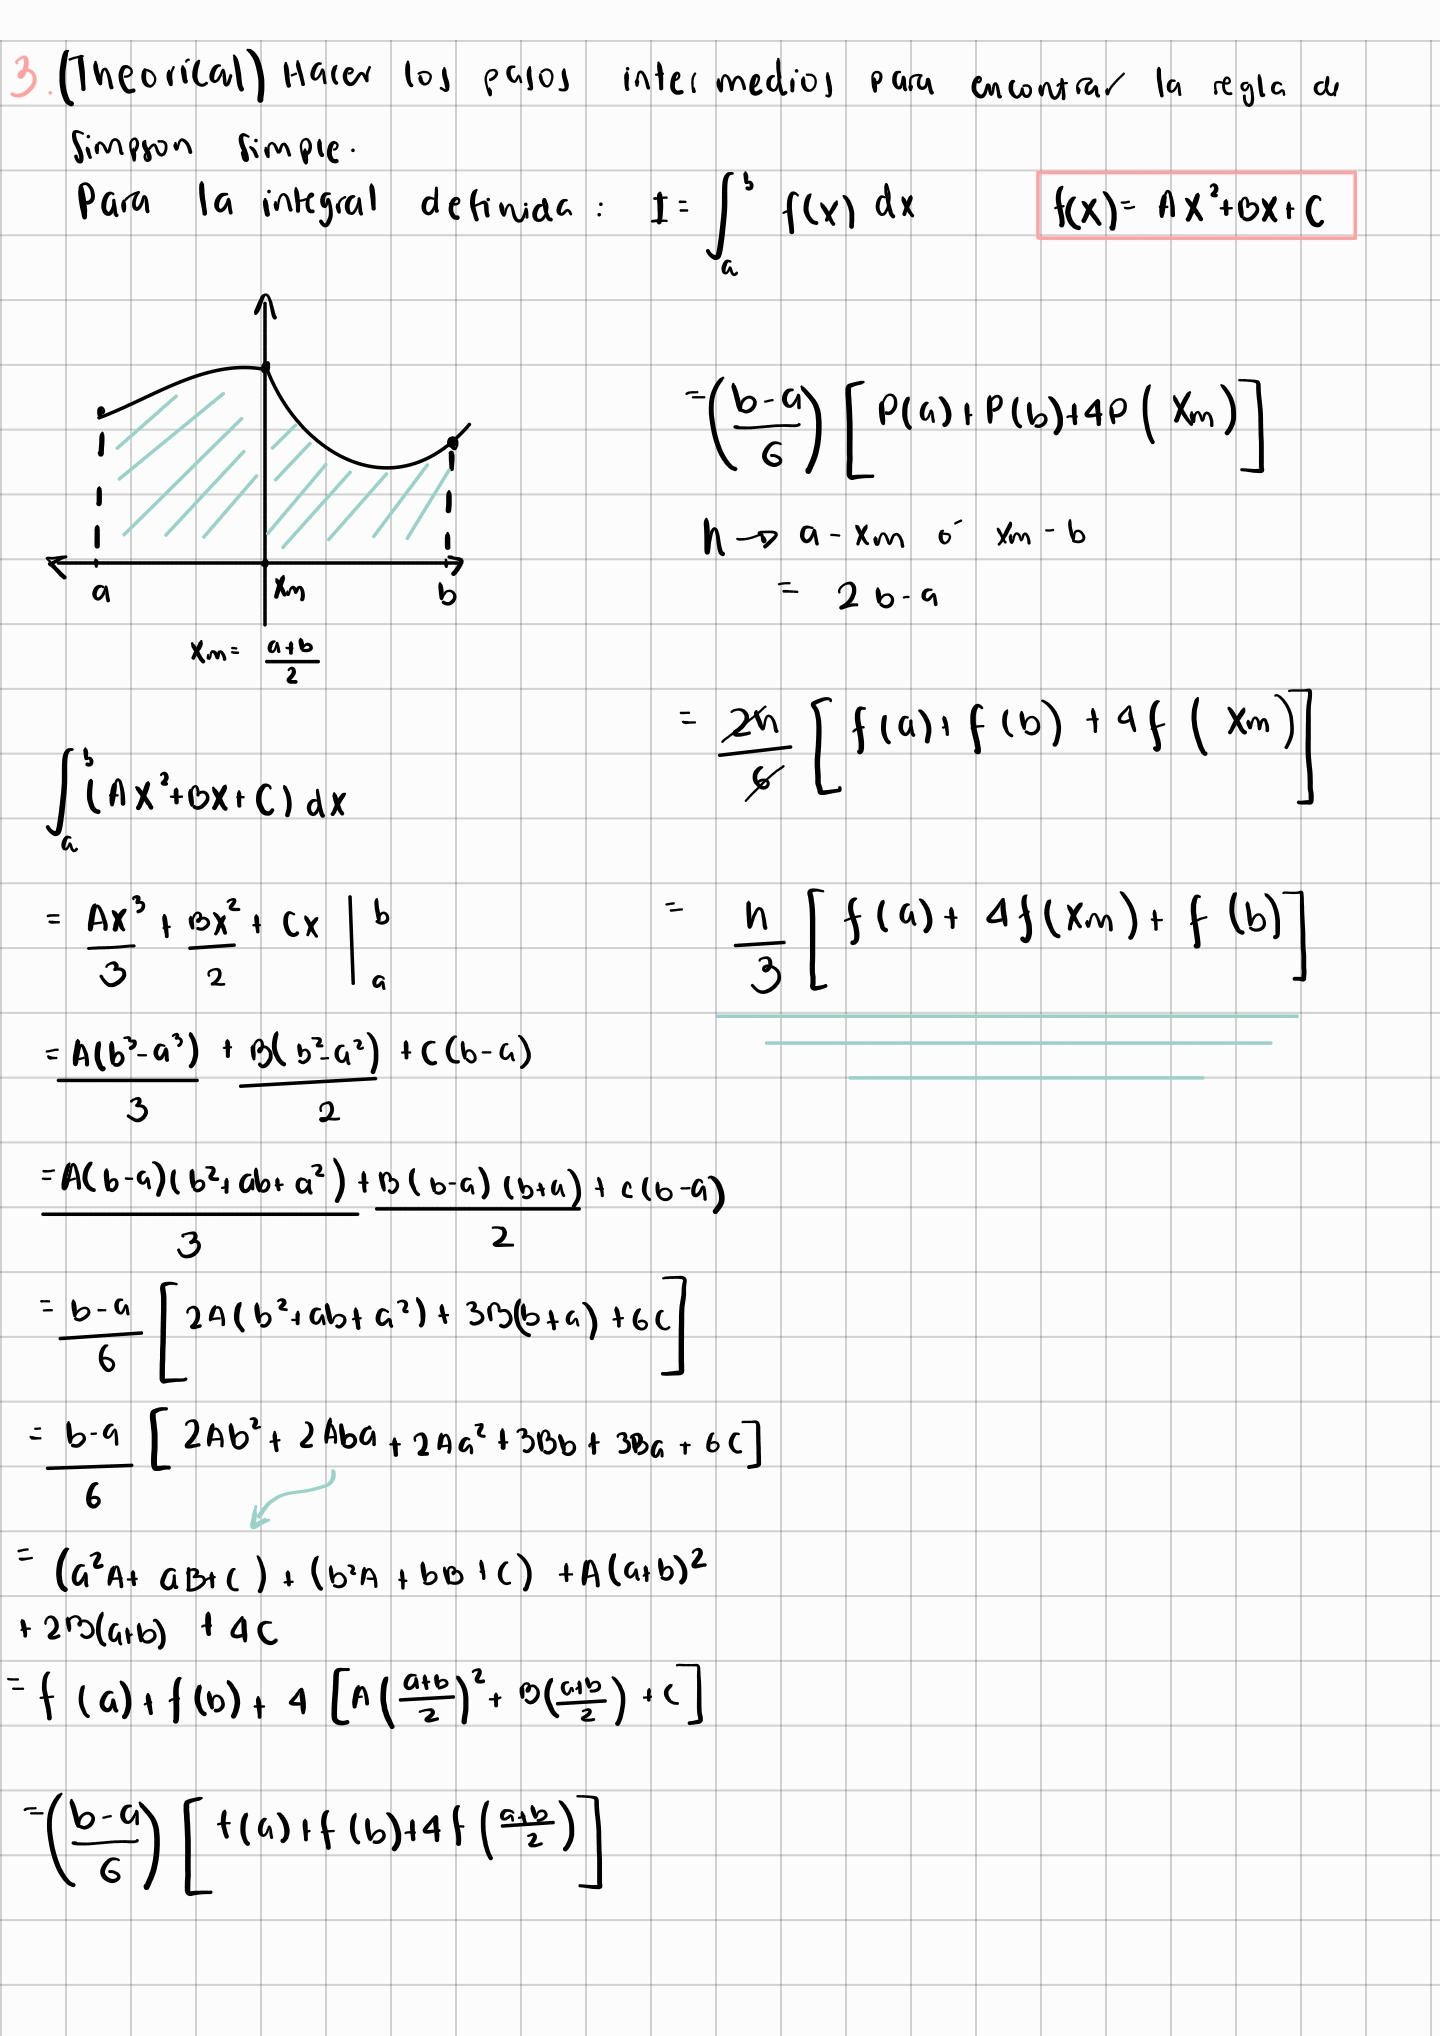

##5. Resolver la siguiente integral con el método del trapecio.

In [ ]:
N = 100
f = lambda x: np.exp(-x**2)
x = np.linspace(0,1,N+1)

In [ ]:
def trapecio_compuesto(x,f):
  #definir paso de integración
  h = x[1]-x[0]
  #primer y úlitmo punto
  Integral = 0
  Integral = 0.5*( f(x[0])+f(x[-1]) )*h
  #sumar el resto de puntos
  Integral += np.sum(f(x[1:-1]))*h
  return Integral

In [ ]:
integral = trapecio_compuesto(x,f)
integral

0.7468180014679701

## 6. Para  encontrar  la  inductancia  exacta  de  una  bobina  toroidal  es  necesario  calcular  la integral:




donde R=  0.5 cme s  el  radio  al  centro  del  toriode  y a=  0.01 cm es  el  radio  de  la sección transversal del toriode.  Estimar la integral con el método del trapecio y la regla de Simpson 1/3, con un error menor al 0.5%.  Realizar la integral es un verdadero reto analítico.

In [ ]:
R= 0.5
a= 0.01
def integrar(x, R, a):
    return np.sqrt(a**2 - x**2) / (R + x)

def metodo_trapecio(f, a, b, N, R, ap):
    x = np.linspace(a, b, N+1)
    y = f(x, R, ap)
    h = (b - a) / N
    integral = h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])
    return integral

def simpson_13(f, a, b, R, ap):
    h = (b - a) / 2
    x0 = a
    x1 = (a + b)/2
    x2 = b
    integral = (h / 3) * (f(x0, R, ap) + 4 * f(x1, R, ap) + f(x2, R, ap))
    return integral
limite_inferior=-a
limite_superior=a
N = 35
integral_trapecio = metodo_trapecio(integrar, limite_inferior, limite_superior, N, R, a)
integral_simpson =simpson_13(integrar, limite_inferior, limite_superior, R, a)
solucion_analitica = np.pi * (R - np.sqrt(R**2 - a**2))
print(integral_simpson, integral_trapecio, solucion_analitica)

error_trapecio= np.abs((integral_trapecio - solucion_analitica) / solucion_analitica)*100
error_simpson= np.abs(integral_simpson - solucion_analitica) / solucion_analitica*100
print (error_trapecio, error_simpson)

0.0002666666666666667 0.00031258649874605314 0.0003141906875702543
0.5105780940252933 15.125852796945507


##7. Calcule numéricamente el volumen de una semiesfera de radio R= 1 como sigue:

Una forma de generalizar el método de integración del trapecio para una integral doble de una función f(x,y) consiste en dividir el plano xy en un grilla de cuadrados iguales y calcular el promedio del valor de la función de cada uno de los 4 vértices de cada cuadrado pequeño de la grilla.

a)  Cree una grilla entre −R y R en el plano xy, donde el número de cuadrados en cadalado  de  la  grilla  sean.   Es  decir,  la  grilla  tendría n+ 1  puntos  en  cada  eje,  y n^2 cuadrados pequeños.

In [ ]:
r = 1
n = 100
x = np.linspace(-r,r,n+1)
y = np.linspace(-r,r,n+1)
X,Y = np.meshgrid(x,y)

b)  Para cada cuadrado pequeño calcule el promedio de la función en los cuatro vértices y multiplique por el área del cuadrado pequeño.  Si el punto queda fuera de la esfera asuma que el valor de la función f(x,y) es cero.

In [ ]:
def Z(x,y,r):
  if np.sqrt(x**2 + y**2) < r:
    return np.sqrt(r**2 - x**2 - y**2)
  else:
    return 0

volumen = 0

for i in range(n):
    for j in range(n):

        x1, y1 = x[i], y[j]
        x2, y2 = x[i+1], y[j]
        x3, y3 = x[i], y[j+1]
        x4, y4 = x[i+1], y[j+1]

        promedio = (Z(x1, y1, r) + Z(x2, y2, r) + Z(x3, y3, r) + Z(x4, y4, r)) / 4
        area = (x[1] - x[0]) * (y[1] - y[0])
        volumen += promedio * area

volumen

2.0938469983277797

##9.(Sympy) La regla de Simpson 3/8 consiste en aproximar el integrando por un polinomiointerpolador de orden 3

 a)  Encontrar  las  funciones  cardinales  de  dicha  interpolación  e  integrar  para  demostrar.

In [ ]:
h= sym.Symbol('h',Real=True)
f= sym.Function('f',Real=True)
x= sym.Symbol('x',Real=True)
X= [0,h,2*h,3*h]

In [ ]:
def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return sym.simplify(L)

def simpson_38(a, b, func):
    h = (b - a) / 3
    x0 = a
    x1 = (2*a + b) / 3
    x2 = (a + 2*b) / 3
    x3 = b

    integral = (3 * h / 8) * (func(x0) + 3 * func(x1) + 3 * func(x2) + func(x3))
    return integral

In [ ]:
L0= Lagrange(x,X,0)
L0

(h - x)*(2*h - x)*(3*h - x)/(6*h**3)

In [ ]:
L1= Lagrange(x,X,1)
L1

x*(2*h - x)*(3*h - x)/(2*h**3)

In [ ]:
L2= Lagrange(x,X,2)
L2

-x*(h - x)*(3*h - x)/(2*h**3)

In [ ]:
L3=Lagrange(x,X,3)
L3

x*(h - x)*(2*h - x)/(6*h**3)

In [ ]:
integral = simpson_38(a, b, f)
integral

0.125*f(0) + 0.375*f(0.333333333333333) + 0.375*f(0.666666666666667) + 0.125*f(1)

b)  Dado  queh=   (b−a)/3,  muestre  que  los  puntos  intermedios  son2a+b3ya+2b3respectivamente.

In [ ]:
a, b = sym.symbols('a b')

h = (b - a) / 3
x1 = a + h
x2 = a + 2 * h

x1_simplified = sym.simplify(x1)
x2_simplified = sym.simplify(x2)
x1_simplified

2*a/3 + b/3

In [ ]:
x2_simplified

a/3 + 2*b/3

## 10. (Sympy) Muestre  el error asociado a la regla de Simpson 3/8 simple

In [ ]:
x = sym.Symbol('x')
h = sym.Symbol('h')
e = sym.Symbol('ξ')
f = sym.Function('f4')(e)

n=3
integral = sym.integrate(x*(x-h)*(x-2*h)*(x-3*h),x)

integral_evaluada = integral.subs(x,(3*h))-integral.subs(x,(0))

error = (integral_evaluada/np.math.factorial(4))*(f)
error

<ipython-input-29-3dfb6783b6a6>:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  error = (integral_evaluada/np.math.factorial(4))*(f)


-3*h**5*f4(ξ)/80

##15. (Sympy) Dada la aproximación de cuadratura gausiana:

a)  Halle los ceros de los primeros 20 polinomios de Legendre

In [ ]:
Roots, Weights = np.polynomial.legendre.leggauss(20)
Roots

def GetNewtonMethod(f,df,xn,itmax = 10000, precision=1e-14):
    error = 1.
    it = 0
    while error >= precision and it < itmax:
        try:
            xn1 = xn - (f(xn)/df(xn))
            error = np.abs( (xn1-xn)/xn )
        except ZeroDivisionError:
            print("zero division")
        xn  = xn1
        it += 1
    if it == itmax:
        return False
    else:
        return xn

def GetAllRoots(f,df,x, tolerancia=13):
    Roots = np.array([])
    for i in x:
        root = GetNewtonMethod(f,df,i)
        if root != False:
            croot = np.round( root, tolerancia )
            if croot not in Roots:
                Roots = np.append( Roots, croot )
    Roots.sort()
    return Roots

def GetLegendre(n):

  x = sym.Symbol('x',Real=True)
  y = sym.Symbol('y',Real=True)
  y = (x**2 - 1)**n
  p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))
  return p

Legendre = []
DLegendre = []
x = sym.Symbol('x',Real=True)
n=20
for i in range(n+1):
    poly = GetLegendre(i)
    Legendre.append(poly)
    DLegendre.append(sym.diff(poly,x,1))

def GetRootsPolynomial(n,xi,poly,dpoly):

    x = sym.Symbol('x',Real=True)
    pn = sym.lambdify([x],poly[n],'numpy')
    dpn = sym.lambdify([x],dpoly[n],'numpy')
    Roots = GetAllRoots(pn,dpn,xi)

    return Roots

xi= np.linspace(-1,1,100)
Roots = GetRootsPolynomial(n,xi,Legendre,DLegendre)
print(Roots)

<ipython-input-30-49b7eb146c1f>:36: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))


[-0.9931286  -0.96397193 -0.91223443 -0.83911697 -0.74633191 -0.74633191
 -0.63605368 -0.510867   -0.37370609 -0.22778585 -0.07652652  0.07652652
  0.22778585  0.37370609  0.510867    0.63605368  0.74633191  0.74633191
  0.83911697  0.91223443  0.96397193  0.9931286 ]


b)  Halle los pesos de ponderación para los primeros 20 polinomios de Legendre.

In [ ]:
def GetWeights(Roots,Dpoly):

  Weights = np.array([])

  x = sym.Symbol('x',real=True)
  dpn = sym.lambdify([x],Dpoly[n],'numpy')

  for r in Roots:
    Weights = np.append(Weights,2/((1-r**2)*dpn(r)**2))

  return Weights

Weights = GetWeights(Roots,DLegendre)
print(Weights)

[0.01761401 0.04060143 0.06267205 0.08327674 0.10193012 0.10193012
 0.11819453 0.13168864 0.14209611 0.14917299 0.15275339 0.15275339
 0.14917299 0.14209611 0.13168864 0.11819453 0.10193012 0.10193012
 0.08327674 0.06267205 0.04060143 0.01761401]


##16. Estime la siguiente integral usando el método de cuadratura de Gauss-Legendre

In [ ]:
#Preparación pesos y ceros de los polinomios

def GetNewtonMethod(f,df,xn,itmax = 10000, precision=1e-14):

    error = 1.
    it = 0
    while error >= precision and it < itmax:
        try:
            xn1 = xn - f(xn)/df(xn)

            error = np.abs( (xn1-xn)/xn )

        except ZeroDivisionError:
            print("zero division")
        xn  = xn1
        it += 1

    if it == itmax:
        return False
    else:
        return xn

In [ ]:
def GetAllRoots(f,df,x, tolerancia=13):

    Roots = np.array([])

    for i in x:
        root = GetNewtonMethod(f,df,i)

        if root != False:
            croot = np.round( root, tolerancia )
            if croot not in Roots:
                Roots = np.append( Roots, croot )
    Roots.sort()

    return Roots

In [ ]:
def GetLegendre(n):

  x = sym.Symbol('x',Real=True)
  y = sym.Symbol('y',Real=True)

  y = (x**2 - 1)**n

  p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))

  return p

In [ ]:
Legendre = []
DLegendre = []

x = sym.Symbol('x',Real=True)
n = 4
for i in range(n+1):

    poly = GetLegendre(i)
    Legendre.append(poly)
    DLegendre.append(sym.diff(poly,x))

<ipython-input-34-adbe1921b909>:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))


In [ ]:
def GetRootsPolynomial(n,xi,poly,dpoly):

    x = sym.Symbol('x',Real=True)
    pn = sym.lambdify([x],poly[n],'numpy')
    dpn = sym.lambdify([x],dpoly[n],'numpy')
    Roots = GetAllRoots(pn,dpn,xi)

    return Roots

In [ ]:
xi = np.linspace(-1,1,100,dtype=np.longdouble)
Roots = GetRootsPolynomial(4,xi,Legendre,DLegendre)

In [ ]:
def GetWeights(Roots,Dpoly):

  Weights = np.array([])

  x = sym.Symbol('x',real=True)
  dpn = sym.lambdify([x],Dpoly[n],'numpy')

  for r in Roots:
    Weights = np.append(Weights,2/((1-r**2)*dpn(r)**2))

  return Weights

In [ ]:
Weights = GetWeights(Roots,DLegendre)
Weights

array([0.34785485, 0.65214515, 0.65214515, 0.34785485], dtype=float128)

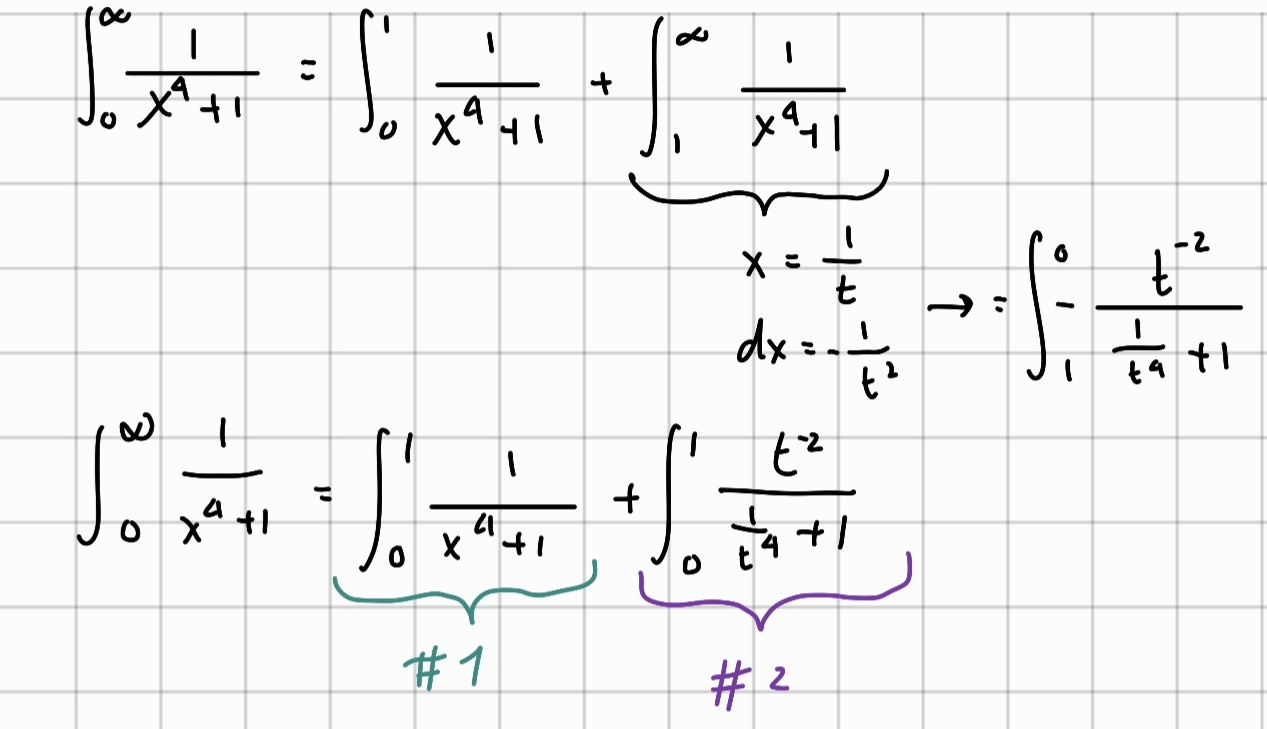

In [ ]:
#Integral 1
a = 0
b = 1
x = sym.Symbol('x',real=True)
f1 = lambda x: 1/((x**4)+1)
t = 0.5*( (b-a)*Roots + b + a )
Integral1 = 0.5*(b-a)*np.sum(Weights*f1(t))

In [ ]:
#Integral 2
a = 0
b = 1
f2 = lambda x: 1/(((1/(x**4))+1)*(x**(2)))
t = 0.5*( (b-a)*Roots + b + a )
Integral2 = 0.5*(b-a)*np.sum(Weights*f2(t))

In [ ]:
#Integral Final
Integral = Integral1 + Integral2
Integral

1.1107825884024518031

##17. a)  Compute this integral using the Gauss-Laguerre quadrature method for n=3 evaluationpoints

In [ ]:
Roots, Weights = np.polynomial.laguerre.laggauss(3)
Roots, Weights

f = lambda x: (x**3)/(1 - np.exp(-x))
Integral = np.sum(Weights * f(Roots))
print(Integral)
Exact= (np.pi**4)/15
print(Exact)

6.481130171540027
6.493939402266828




b)  For this estimation, plot the relative error (εr(n) =Iestimated(n)/Iexact) as a functionof the evaluation points, withn= [2,3,...,10] [4.6].


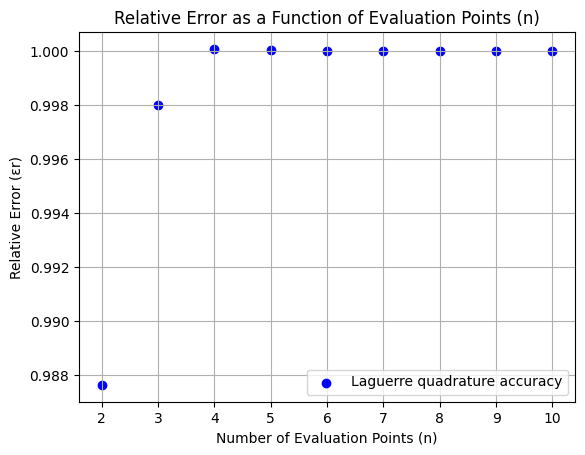

In [ ]:
n_values = np.arange(2, 11)
relative_errors = []

for n in n_values:
    roots, weights = np.polynomial.laguerre.laggauss(n)
    I_estimated = np.sum(weights * f(roots))
    relative_error = I_estimated / Exact
    relative_errors.append(relative_error)

plt.scatter(n_values, relative_errors, marker='o', linestyle='-', color='b', label= "Laguerre quadrature accuracy")
plt.xlabel('Number of Evaluation Points (n)')
plt.ylabel('Relative Error (εr)')
plt.title('Relative Error as a Function of Evaluation Points (n)')
plt.legend()
plt.grid(True)
plt.show()

##21. El problema computacional requiere la estimaci ́on de los coeficientes de la expansión


(a)  (Theoretical) Usando las relaciones de ortogonalidad de los polinomios de Legendre, muestre que los coeficientes están dados por:

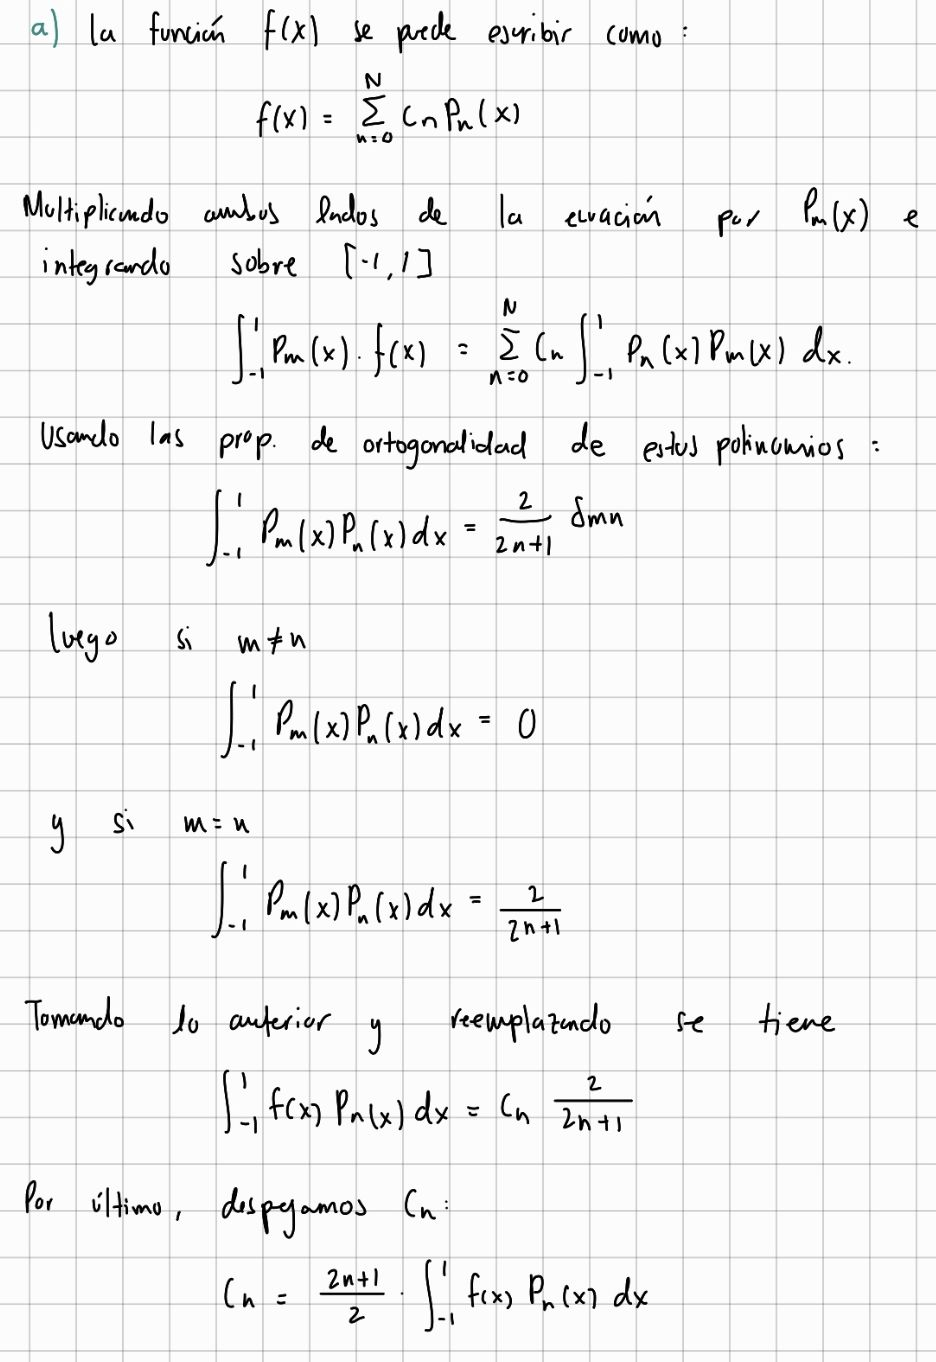

b)  Implemente la función sgn(x)

In [ ]:
def signo(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))

c)  Vectorice y dibuje la función

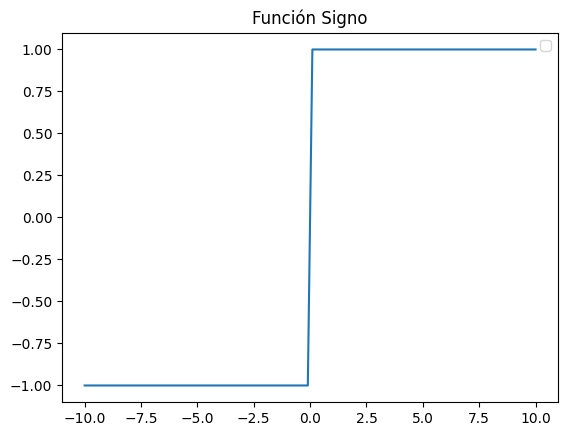

In [ ]:
vectorizada = np.vectorize(signo)
x = np.linspace(-10,10,100)
plt.plot(x,vectorizada(x))
plt.title("Función Signo")
plt.legend()
plt.show()

d)  Defina los puntos y los pesos de Gauss-Legendre al grado n= 15

In [78]:
def GetLegendre(n):

  x = sym.Symbol('x',Real=True)
  y = sym.Symbol('y',Real=True)
  y = (x**2 - 1)**n
  p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))
  return p

Legendre = []
DLegendre = []
n=15

for i in range(n+1):
    poly = GetLegendre(i)
    Legendre.append(poly)
    DLegendre.append(sym.diff(poly,x))

<ipython-input-78-259d737ae1af>:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))


In [76]:
def GetRootsPolynomial(n,xi,poly,dpoly):

    x = sym.Symbol('x',Real=True)
    pn = sym.lambdify([x],poly[n],'numpy')
    dpn = sym.lambdify([x],dpoly[n],'numpy')
    Roots = GetAllRoots(pn,dpn,xi)

    return Roots

xi = np.linspace(-1,1,100,dtype=np.longdouble)
Roots= GetRootsPolynomial(15,xi,Legendre,DLegendre)
Weights = GetWeights(Roots,DLegendre)

<ipython-input-32-657b5bd5ae20>:11: RuntimeWarning: invalid value encountered in scalar divide
  error = np.abs( (xn1-xn)/xn )


In [77]:
Weights

array([0.03075324, 0.07036605, 0.10715922, 0.13957068, 0.16626921,
       0.186161  , 0.19843149, 0.19843149, 0.186161  , 0.16626921,
       0.13957068, 0.10715922, 0.07036605, 0.03075324], dtype=float128)

In [74]:
Roots

array([-0.98799252, -0.93727339, -0.84820658, -0.72441773, -0.57097217,
       -0.39415135, -0.20119409,  0.20119409,  0.39415135,  0.57097217,
        0.72441773,  0.84820658,  0.93727339,  0.98799252], dtype=float128)

e)  Cree y guarde los polinomios de Legendre al grado N= 20

In [68]:
def GetLegendre(n):

  x = sym.Symbol('x',Real=True)
  y = sym.Symbol('y',Real=True)
  y = (x**2 - 1)**n
  p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))
  return p

Legendre = []
n=20


for i in range(n+1):
    poly = GetLegendre(i)
    Legendre.append(poly)

Legendre

<ipython-input-68-e258cec1d308>:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))


[1,
 x,
 (3*x**2 - 1)/2,
 x*(5*x**2 - 3)/2,
 (8*x**4 + 24*x**2*(x**2 - 1) + 3*(x**2 - 1)**2)/8,
 x*(8*x**4 + 40*x**2*(x**2 - 1) + 15*(x**2 - 1)**2)/8,
 (16*x**6 + 120*x**4*(x**2 - 1) + 90*x**2*(x**2 - 1)**2 + 5*(x**2 - 1)**3)/16,
 x*(16*x**6 + 168*x**4*(x**2 - 1) + 210*x**2*(x**2 - 1)**2 + 35*(x**2 - 1)**3)/16,
 (128*x**8 + 1792*x**6*(x**2 - 1) + 3360*x**4*(x**2 - 1)**2 + 1120*x**2*(x**2 - 1)**3 + 35*(x**2 - 1)**4)/128,
 x*(128*x**8 + 2304*x**6*(x**2 - 1) + 6048*x**4*(x**2 - 1)**2 + 3360*x**2*(x**2 - 1)**3 + 315*(x**2 - 1)**4)/128,
 (256*x**10 + 5760*x**8*(x**2 - 1) + 20160*x**6*(x**2 - 1)**2 + 16800*x**4*(x**2 - 1)**3 + 3150*x**2*(x**2 - 1)**4 + 63*(x**2 - 1)**5)/256,
 x*(256*x**10 + 7040*x**8*(x**2 - 1) + 31680*x**6*(x**2 - 1)**2 + 36960*x**4*(x**2 - 1)**3 + 11550*x**2*(x**2 - 1)**4 + 693*(x**2 - 1)**5)/256,
 (1024*x**12 + 33792*x**10*(x**2 - 1) + 190080*x**8*(x**2 - 1)**2 + 295680*x**6*(x**2 - 1)**3 + 138600*x**4*(x**2 - 1)**4 + 16632*x**2*(x**2 - 1)**5 + 231*(x**2 - 1)**6)/1024,
 x

f)  Cree una función que calcule los N+ 1 coeficientes en un array de numpy

In [96]:
x= sym.symbols('x',Real=True)
y= sym.symbols('y',Real=True)
xi,wi = np.polynomial.legendre.leggauss(15)

N=20
Legendre=[]
for i in range (N+1):
  Legendre.append(GetLegendre(i+1))

def pn(Legendre):
  pn= sym.lambdify([x],Legendre,'numpy')
  return pn

def coeficientes_(n,f,Legendre):
  cn=1.0
  cn*=np.sum(wi*f(xi)*pn(Legendre)(xi))
  cn*= (2*n+1)/2
  return cn

cn=np.zeros(N)
for i in range(N):
  cn[i]=coeficientes_(i,signo,Legendre[i])
cn

<ipython-input-78-259d737ae1af>:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))


array([ 4.96570769e-01,  1.04083409e-17, -5.99101845e-01,  2.42861287e-17,
        5.03483917e-01, -5.72458747e-17, -4.06461952e-01, -2.60208521e-17,
        3.11852425e-01, -1.64798730e-17, -2.15678291e-01, -1.99493200e-17,
        1.13441801e-01,  0.00000000e+00, -1.72317477e-17,  6.72205347e-17,
       -1.31556823e-01, -1.51788304e-17,  2.92002804e-01,  3.38271078e-17])

g)  Calcule la combinación lineal para cada valor del dominio que uso para dibujar la función original

In [97]:
def combinacion(x,cn):
  comb = 0
  x = sym.symbols('x')

  for i in range(N+1):
    poly = GetLegendre(i)
    pn = sym.lambdify(x,poly,'numpy')

    coef = coeficientes_(i,f,Legendre)

    comb += coef*pn(x)

  return comb
comb=combinacion(x,coeficientes_)
comb

<ipython-input-78-259d737ae1af>:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))
<ipython-input-43-0e10e7caa305>:4: RuntimeWarning: invalid value encountered in divide
  f = lambda x: (x**3)/(1 - np.exp(-x))


nan

In [98]:
from tqdm import tqdm
_x = np.linspace(-1,1,101)
comb = np.zeros(len(_x))
_yapprox = np.zeros(len(_x))

def Pn(Legendre):
    pn = sym.lambdify([x],Legendre,'numpy')
    return pn

for i in tqdm(range(len(comb))):

    sum_ = 0.
    for j in range(N):
        sum_ += cn[j]*pn(Legendre[j])(_x[i])

    comb[i] = sum_

100%|██████████| 101/101 [00:10<00:00, 10.02it/s]


h)  Dibuje la representación en la base de Legendre

In [93]:
x = np.linspace(-10,10,100)
y = combinacion(x, cn)

plt.plot(x, y, label='Aproximación polinomial')
plt.plot(x, vectorizada(x), label='sgn(x)')
plt.title("Función Signo")
plt.legend()
plt.grid()
plt.show()

<ipython-input-78-259d737ae1af>:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))
<ipython-input-43-0e10e7caa305>:4: RuntimeWarning: invalid value encountered in divide
  f = lambda x: (x**3)/(1 - np.exp(-x))


SyntaxError: cannot assign to expression (<lambdifygenerated-977>, line 2)

NameError: name '_x' is not defined

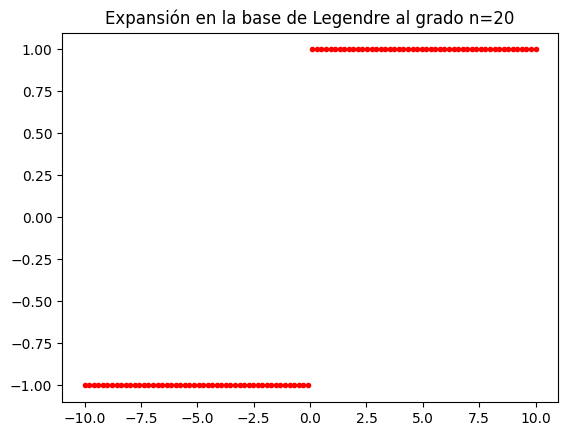

In [ ]:
plt.title('Expansión en la base de Legendre al grado n={}'.format(N))
plt.scatter(x,vectorizada(x),color='r',marker='.',label=r'$sgn(x)$')
plt.plot(_x,_yapprox,color='b',label=r'$\sum_{n} c_{n}P_{n}(x)$')
plt.legend()